<a href="https://colab.research.google.com/github/MDankloff/ClusterCompas/blob/main/V2_COMPAS_data_inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import os


# LOAD DATA

In [2]:
#compas_s = pd.read_csv("/content/final_preprocessed_compas(2).csv")
#ofercompas = pd.read_csv("/content/propublica_data_for_fairml.csv")
originalcompas = pd.read_csv("/content/compas-scores-two-years.csv")
#compas_2 = pd.read_csv('/content/cleaned_compas_data.csv')

#originalcompas.info()
#originalcompas.head()

In [3]:
#Check if is_recid and two year recid are the same
'''if (originalcompas['is_recid'] == originalcompas['two_year_recid']).any():
    print("same")
else:
    print("not same")'''

'if (originalcompas[\'is_recid\'] == originalcompas[\'two_year_recid\']).any():\n    print("same")\nelse:\n    print("not same")'

In [5]:
compas = originalcompas.drop(['age_cat','event','priors_count.1','is_violent_recid','is_recid','score_text','v_decile_score','id','name','first','last', 'dob', 'compas_screening_date', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
                     'c_charge_degree', 'c_charge_desc', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date',
                     'vr_charge_desc', 'screening_date', 'v_screening_date', 'in_custody', 'out_custody', 'start', 'end', 'decile_score.1', 'v_score_text', 'type_of_assessment', 'v_type_of_assessment'], axis=1)
compas.info()
compas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             7214 non-null   object
 1   age             7214 non-null   int64 
 2   race            7214 non-null   object
 3   decile_score    7214 non-null   int64 
 4   priors_count    7214 non-null   int64 
 5   two_year_recid  7214 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 338.3+ KB


,sex,age,race,decile_score,priors_count,two_year_recid
0,Male,69,Other,1,0,0
1,Male,34,African-American,3,0,1
2,Male,24,African-American,4,4,1
3,Male,23,African-American,8,1,0
4,Male,43,Other,1,2,0


In [6]:
#get Dummies for sex, age_cat and race
dummy_cols = ['sex', 'race']
compas_2_dummies = pd.get_dummies(compas[dummy_cols], columns = dummy_cols, prefix=dummy_cols)
compas_2 = pd.concat([compas, compas_2_dummies], axis=1)

#print(compas_2.columns)
compas_2.info()
compas_2.iloc[3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sex                    7214 non-null   object
 1   age                    7214 non-null   int64 
 2   race                   7214 non-null   object
 3   decile_score           7214 non-null   int64 
 4   priors_count           7214 non-null   int64 
 5   two_year_recid         7214 non-null   int64 
 6   sex_Female             7214 non-null   bool  
 7   sex_Male               7214 non-null   bool  
 8   race_African-American  7214 non-null   bool  
 9   race_Asian             7214 non-null   bool  
 10  race_Caucasian         7214 non-null   bool  
 11  race_Hispanic          7214 non-null   bool  
 12  race_Native American   7214 non-null   bool  
 13  race_Other             7214 non-null   bool  
dtypes: bool(8), int64(4), object(2)
memory usage: 394.6+ KB


sex                                  Male
age                                    23
race                     African-American
decile_score                            8
priors_count                            1
two_year_recid                          0
sex_Female                          False
sex_Male                             True
race_African-American                True
race_Asian                          False
race_Caucasian                      False
race_Hispanic                       False
race_Native American                False
race_Other                          False
Name: 3, dtype: object

In [7]:
#Choose attributes for model
X = compas_2.drop(['two_year_recid','sex', 'race'], axis= 1)
Y = compas_2['two_year_recid']

X.info()
#X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    7214 non-null   int64
 1   decile_score           7214 non-null   int64
 2   priors_count           7214 non-null   int64
 3   sex_Female             7214 non-null   bool 
 4   sex_Male               7214 non-null   bool 
 5   race_African-American  7214 non-null   bool 
 6   race_Asian             7214 non-null   bool 
 7   race_Caucasian         7214 non-null   bool 
 8   race_Hispanic          7214 non-null   bool 
 9   race_Native American   7214 non-null   bool 
 10  race_Other             7214 non-null   bool 
dtypes: bool(8), int64(3)
memory usage: 225.6 KB


In [8]:
Y.head()
Y.value_counts()

two_year_recid
0    3963
1    3251
Name: count, dtype: int64

## CHANGE BOOLEANS TO NUMERIC FOR SHAP TO WORK LATER

In [9]:
#change booleans to numeric
X = X.astype(int)
Y = Y.astype(int)

X.iloc[3]

age                      23
decile_score              8
priors_count              1
sex_Female                0
sex_Male                  1
race_African-American     1
race_Asian                0
race_Caucasian            0
race_Hispanic             0
race_Native American      0
race_Other                0
Name: 3, dtype: int64

## Create Scaled version of X as well

In [22]:



#Create a Scaled version for X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns= X.columns)
X_scaled.iloc[3]

#merge X_scaled and X into one dataframe
X_all = X.merge(X_scaled, how = 'outer',  left_index = True, right_index = True)
X_all.iloc[3]
#Rename columns!

age_x                      23.000000
decile_score_x              8.000000
priors_count_x              1.000000
sex_Female_x                0.000000
sex_Male_x                  1.000000
race_African-American_x     1.000000
race_Asian_x                0.000000
race_Caucasian_x            0.000000
race_Hispanic_x             0.000000
race_Native American_x      0.000000
race_Other_x                0.000000
age_y                      -0.994103
decile_score_y              1.222057
priors_count_y             -0.506414
sex_Female_y               -0.489624
sex_Male_y                  0.489624
race_African-American_y     0.975623
race_Asian_y               -0.066750
race_Caucasian_y           -0.718015
race_Hispanic_y            -0.311212
race_Native American_y     -0.050014
race_Other_y               -0.234822
Name: 3, dtype: float64

# TRAIN RANDOM FOREST CLASSIFIER

In [23]:
#training on a scaled X unnecessary for random forest but good for shap later
X_all_train, X_all_test, Y_train, Y_test = train_test_split(X_all, Y,
                                                    #test_size = 0.3,
                                                    test_size = 0.7, shuffle = True, stratify = Y)

X_train = X_all_train.drop(['age_x','decile_score_x', 'priors_count_x', 'sex_Female_x', 'sex_Male_x', 'race_African-American_x', 'race_Asian_x', 'race_Caucasian_x', 'race_Hispanic_x', 'race_Native American_x', 'race_Other_x'], axis=1)
X_test = X_all_test.drop(['age_x','decile_score_x', 'priors_count_x', 'sex_Female_x', 'sex_Male_x', 'race_African-American_x', 'race_Asian_x', 'race_Caucasian_x', 'race_Hispanic_x', 'race_Native American_x', 'race_Other_x'], axis=1)


model = RandomForestClassifier()
model.fit(X_train, Y_train)

#predictions
Yhat = model.predict(X_test)
len(Yhat)

5050

In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5050 entries, 5572 to 4220
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_y                    5050 non-null   float64
 1   decile_score_y           5050 non-null   float64
 2   priors_count_y           5050 non-null   float64
 3   sex_Female_y             5050 non-null   float64
 4   sex_Male_y               5050 non-null   float64
 5   race_African-American_y  5050 non-null   float64
 6   race_Asian_y             5050 non-null   float64
 7   race_Caucasian_y         5050 non-null   float64
 8   race_Hispanic_y          5050 non-null   float64
 9   race_Native American_y   5050 non-null   float64
 10  race_Other_y             5050 non-null   float64
dtypes: float64(11)
memory usage: 473.4 KB


# ADDING THE ERRORS

In [26]:
#Create df to contain the predicted and true classes - converting y_hat np to df
predictions = pd.DataFrame()
predictions['predicted_class'] = Yhat.tolist()
predictions = predictions.set_index(X_test.index)
predictions['true_class'] = Y_test

#Calculating the errors with the absolute value
predictions['errors'] = abs(predictions['predicted_class'] - predictions['true_class'])

#adding predictions to test data
compas_w_error = X_all_test.merge(predictions, how= 'outer', left_index = True, right_index = True)

errors = compas_w_error['errors']
df_out = compas_w_error.drop(['predicted_class', 'true_class', 'errors'], axis=1)
compas_w_error[compas_w_error['errors']==1]

#accuracy & confusion matrix
accuracy = accuracy_score(predictions['true_class'], predictions['predicted_class'])
print(f"Accuracy: {accuracy:.4f}")
cm = confusion_matrix(predictions['true_class'], predictions['predicted_class'])
print(cm)


Accuracy: 0.6267
[[1863  911]
 [ 974 1302]]


## Selecting 4 labels (FP, FN, TP, TN)

In [27]:
def get_error_type(row):
    true_class = row['true_class']
    predicted_class = row['predicted_class']

    if true_class == predicted_class and true_class == 1:
        row['TP'] = 1
        row['TN'] = 0
        row['FN'] = 0
        row['FP'] = 0
    elif true_class == predicted_class and true_class == 0:
        row['TP'] = 0
        row['TN'] = 1
        row['FN'] = 0
        row['FP'] = 0
    elif true_class != predicted_class and true_class == 1:
        row['TP'] = 0
        row['TN'] = 0
        row['FN'] = 1
        row['FP'] = 0
    elif true_class != predicted_class and true_class == 0:
        row['TP'] = 0
        row['TN'] = 0
        row['FN'] = 0
        row['FP'] = 1

    return row

#apply function to rows in data
compas_w_error = compas_w_error.apply(get_error_type, axis=1)

#compas_w_error.info()
compas_w_error.iloc[3]

age_x                      22.000000
decile_score_x              7.000000
priors_count_x              0.000000
sex_Female_x                0.000000
sex_Male_x                  1.000000
race_African-American_x     1.000000
race_Asian_x                0.000000
race_Caucasian_x            0.000000
race_Hispanic_x             0.000000
race_Native American_x      0.000000
race_Other_x                0.000000
age_y                      -1.078221
decile_score_y              0.871941
priors_count_y             -0.711240
sex_Female_y               -0.489624
sex_Male_y                  0.489624
race_African-American_y     0.975623
race_Asian_y               -0.066750
race_Caucasian_y           -0.718015
race_Hispanic_y            -0.311212
race_Native American_y     -0.050014
race_Other_y               -0.234822
predicted_class             1.000000
true_class                  1.000000
errors                      0.000000
TP                          1.000000
TN                          0.000000
F

In [28]:
#Check if there are any FP/FN
'''if (compas_w_error['FP'] == 1).any():
    print("There's at least one occurrence of 1 in the column.")
else:
    print("There's no occurrence of 1 in the column.")'''

'if (compas_w_error[\'FP\'] == 1).any():\n    print("There\'s at least one occurrence of 1 in the column.")\nelse:\n    print("There\'s no occurrence of 1 in the column.")'

## add categorical ERROR_TYPE for VIZ

In [29]:
# Extract dummy variables for error labels
error_type = compas_w_error[['TP', 'FP', 'FN', 'TN']]

# Convert 'Error_type' column to categorical
compas_w_error['Error_Type'] = error_type.idxmax(axis=1).astype('category')

compas_w_error = pd.merge(compas_w_error, compas_2[['sex', 'race']], left_index=True, right_index=True)


In [31]:
#change objects to categories
for col in ['sex', 'race']:
    compas_w_error[col] = compas_w_error[col].astype('category')

compas_w_error.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5050 entries, 5572 to 4220
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age_x                    5050 non-null   float64 
 1   decile_score_x           5050 non-null   float64 
 2   priors_count_x           5050 non-null   float64 
 3   sex_Female_x             5050 non-null   float64 
 4   sex_Male_x               5050 non-null   float64 
 5   race_African-American_x  5050 non-null   float64 
 6   race_Asian_x             5050 non-null   float64 
 7   race_Caucasian_x         5050 non-null   float64 
 8   race_Hispanic_x          5050 non-null   float64 
 9   race_Native American_x   5050 non-null   float64 
 10  race_Other_x             5050 non-null   float64 
 11  age_y                    5050 non-null   float64 
 12  decile_score_y           5050 non-null   float64 
 13  priors_count_y           5050 non-null   float64 
 14  sex_Female

In [102]:
# Rename columns 11 to 21
new_columns = compas_w_error.columns[:11].tolist()  # Keep first 11 columns as they are
new_columns += [col.replace('_y', '_scaled') for col in compas_w_error.columns[11:22]]  # Rename columns 11-21
new_columns += compas_w_error.columns[22:].tolist()  # Keep the rest of the columns as they are

compas_w_error.columns = new_columns

# Display the first few rows with updated column names
compas_w_error.columns

Index(['age_x', 'decile_score_x', 'priors_count_x', 'sex_Female_x',
       'sex_Male_x', 'race_African-American_x', 'race_Asian_x',
       'race_Caucasian_x', 'race_Hispanic_x', 'race_Native American_x',
       'race_Other_x', 'age_scaled', 'decile_score_scaled',
       'priors_count_scaled', 'sex_Female_scaled', 'sex_Male_scaled',
       'race_African-American_scaled', 'race_Asian_scaled',
       'race_Caucasian_scaled', 'race_Hispanic_scaled',
       'race_Native American_scaled', 'race_Other_scaled', 'predicted_class',
       'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'sex',
       'race'],
      dtype='object')

# BASIC VIZ FOR DATA INSPECTION

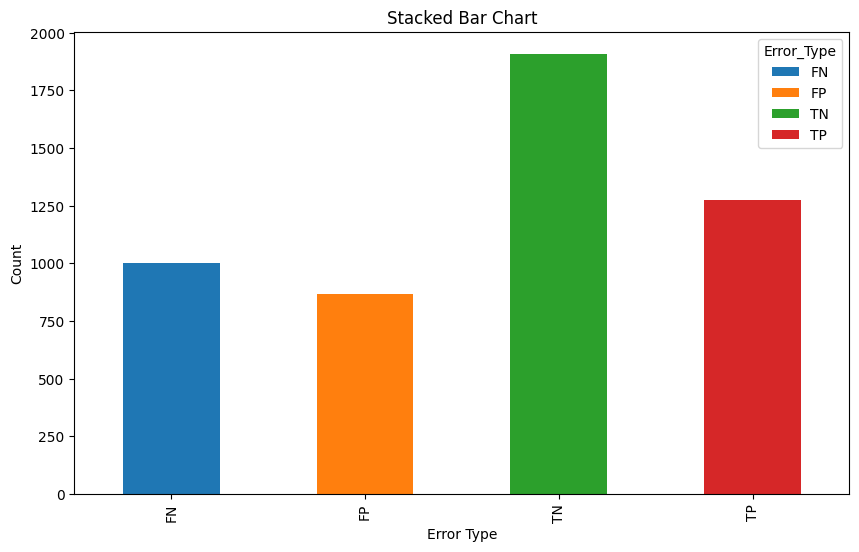

In [ ]:
'''ERROR TYPE BARCHART (FP, FN, TP, TN)'''

errors_df = compas_w_error[['TP', 'FP', 'FN', 'TN']]

# Melt the DataFrame for easy plotting
melted_df = pd.melt(errors_df, var_name='Error_Type', value_name='Count')

# Pivot the DataFrame for stacked bar chart
pivot_df = melted_df.pivot_table(index='Error_Type', columns='Error_Type', values='Count', aggfunc='sum', fill_value=0)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')

# Show the plot
plt.show()


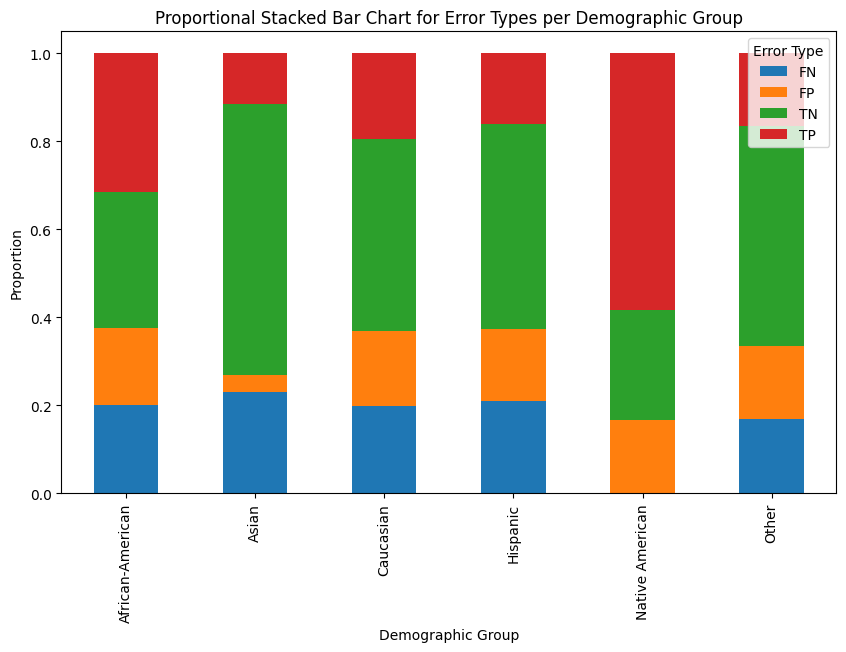

In [ ]:
'''ERROR LABELS PER DEMO GROUP '''
#Group data by 'race' and 'Error_Type' and count occurrences
race_error_counts = compas_w_error.groupby(['race', 'Error_Type']).size().unstack(fill_value=0)

# Normalize counts along the y-axis
race_error_proportions = race_error_counts.div(race_error_counts.sum(axis=1), axis=0)

# Plot the proportional stacked bar chart
race_error_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Proportional Stacked Bar Chart for Error Types per Demographic Group')
plt.xlabel('Demographic Group')
plt.ylabel('Proportion')
plt.legend(title='Error Type', loc='upper right')

# Show the plot
plt.show()

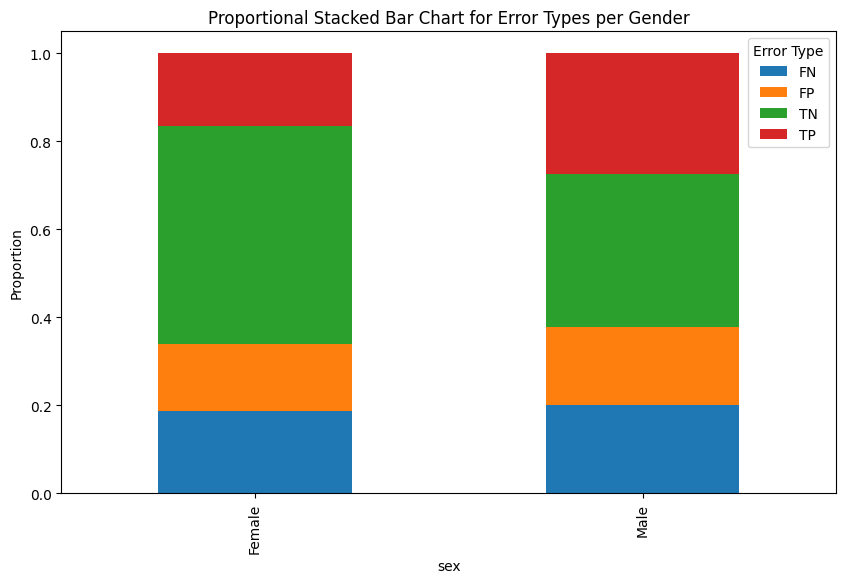

In [ ]:
'''ERROR LABELS PER GENDER '''
#Group data by 'race' and 'Error_Type' and count occurrences
sex_error_counts = compas_w_error.groupby(['sex', 'Error_Type']).size().unstack(fill_value=0)

# Normalize counts along the y-axis
sex_error_proportions = sex_error_counts.div(sex_error_counts.sum(axis=1), axis=0)

# Plot the proportional stacked bar chart
sex_error_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Proportional Stacked Bar Chart for Error Types per Gender')
plt.xlabel('sex')
plt.ylabel('Proportion')
plt.legend(title='Error Type', loc='upper right')

# Show the plot
plt.show()

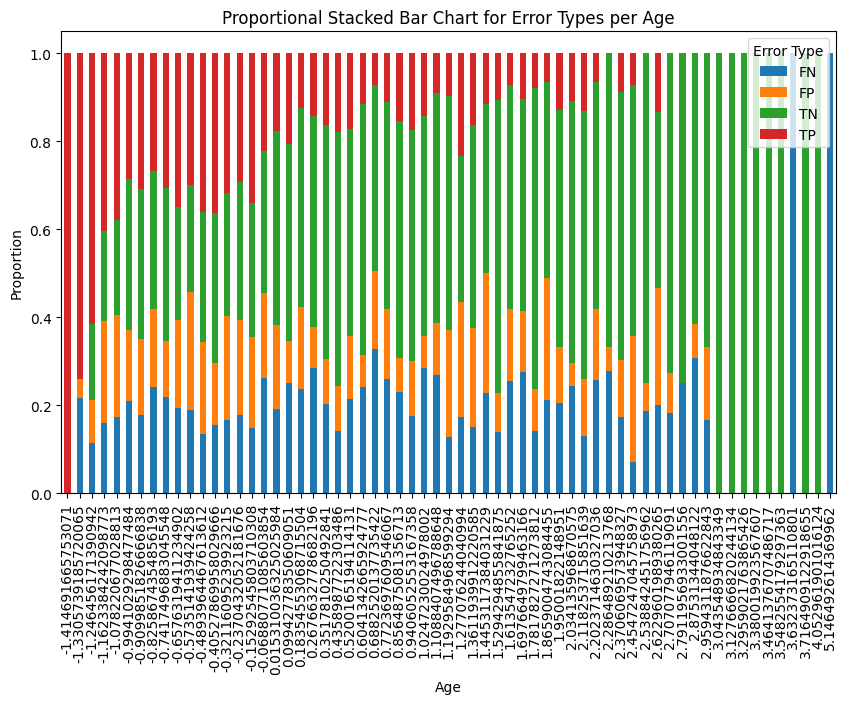

In [ ]:
'''ERROR LABELS PER AGE'''
# Group data by 'age' and 'Error_Type' and count occurrences
age_error_counts = compas_w_error.groupby(['age', 'Error_Type']).size().unstack(fill_value=0)

# Normalize counts along the y-axis
age_error_proportions = age_error_counts.div(age_error_counts.sum(axis=1), axis=0)

# Plot the proportional stacked bar chart
age_error_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Proportional Stacked Bar Chart for Error Types per Age')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend(title='Error Type', loc='upper right')

# Show the plot
plt.show()

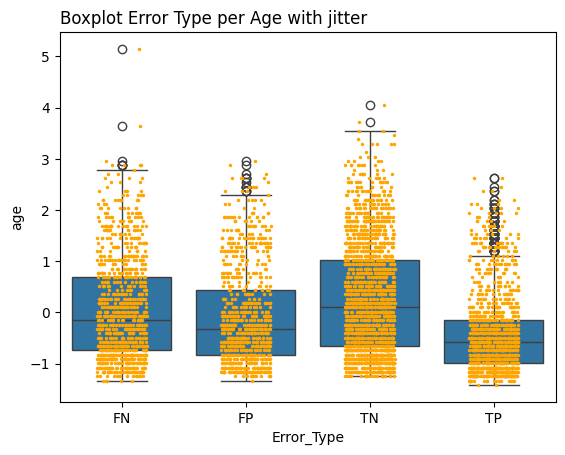

In [ ]:
# '''ERROR LABELS PER AGE JITTER BOXPLOT '''

ax = sns.boxplot(x='Error_Type', y='age', data=compas_w_error)
# add stripplot
ax = sns.stripplot(x='Error_Type', y='age', data=compas_w_error, color="orange", jitter=0.2, size=2.5)

# add title
plt.title("Boxplot Error Type per Age with jitter", loc="left")

# show the graph
plt.show()

Violin plot as combination of boxplot and kernel density plot.

The width represents the densitiy of datapoints at a certian value. Middle bar inside violin represents the interquartile range.


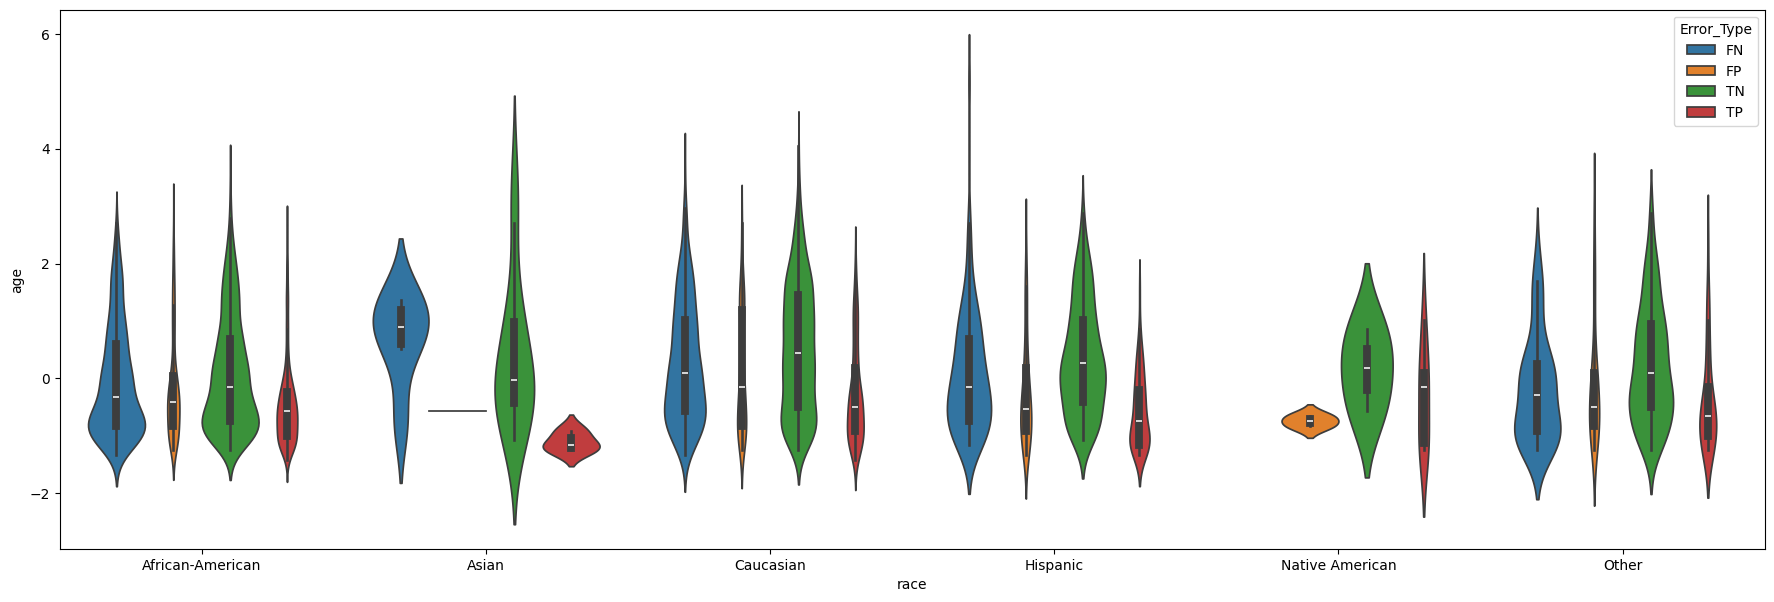

In [ ]:
'''Violin plot as combination of boxplot and kernel density plot.
The width represents the densitiy of datapoints at a certian value. Middle bar inside violin represents the interquartile range.'''
plt.figure(figsize=(22, 7))

sns.violinplot(x="race", y="age", hue = "Error_Type", data=compas_w_error)
plt.show()


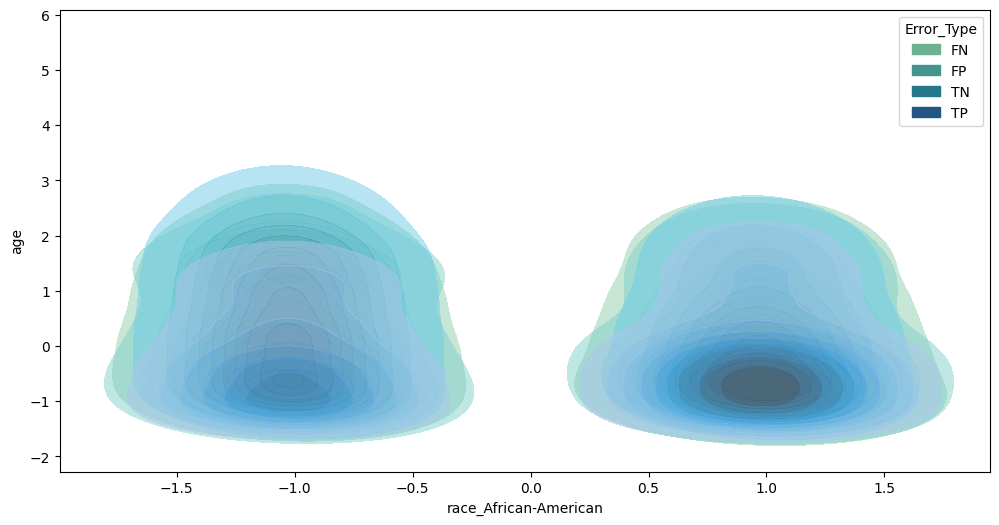

In [ ]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=compas_w_error, x="race_African-American", y="age", hue="Error_Type", fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)

plt.show()


# SHAP

In [32]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.6 MB/s eta 0:00:00


## Scaling before SHAP

SHAP Values: While Random Forests do not require scaling, SHAP values (SHapley Additive exPlanations) are used to interpret the impact of features on the model's output. Scaling features can sometimes make SHAP values more interpretable, especially when features have very different ranges.

In [64]:
#Performing SHAP explainer on the trainset to get the shap values on the testset
tree_explainer = shap.TreeExplainer(model, X_train)

#df_shap_values_ = tree_explainer(X_test, check_additivity=False) #this returns an object instead of an array

shap_values = tree_explainer.shap_values(X_test, check_additivity=False) #Molnar book: if additivity doesnt hold the code produces an error - disable it


100%|===================| 10088/10100 [05:13<00:00]       

In [104]:
'''SHAP returns a list of two arrays one for each class (0 and 1) and gives back a shape of (5050, 14, 2).
It gives an error for mismatch between feature columns in shap and X_test shape (5050,2)'''

shap_values_class1 = shap_values[:, :, 1]  # Select all samples, all features, class 1 for fraud

#plot
#shap.plots.waterfall(shap_values_class1, max_display=11)
#shap.plots.beeswarm(df_shap_values_[0])

print(shap_values_class1)

[[-1.95695889e-01 -1.28698290e-01 -7.63804474e-02 ... -1.86378962e-03
   0.00000000e+00 -9.17051540e-04]
 [-4.75750316e-02 -1.24022238e-01 -2.27873721e-01 ...  1.36930891e-03
   0.00000000e+00 -6.35282146e-04]
 [-1.12040992e-01 -1.05113333e-01  7.29642591e-02 ...  2.83449788e-04
   0.00000000e+00 -1.83855552e-03]
 ...
 [ 1.71297785e-01  1.75973445e-02  1.88264085e-01 ...  3.46078182e-03
   0.00000000e+00 -2.50000379e-03]
 [-9.62370536e-02 -9.89811799e-02 -1.13646247e-01 ...  5.83496054e-04
   0.00000000e+00 -1.97577342e-04]
 [ 1.86496081e-01  1.04832104e-01 -8.09047704e-02 ...  2.08907879e-03
   0.00000000e+00 -1.50048927e-04]]


# Add SHAP Values to dataset

In [114]:
df_shap_values = pd.DataFrame(shap_values_class1, columns=[f'Shap_{col}' for col in X_test.columns])

df_shap_values.head()

,Shap_age_y,Shap_decile_score_y,Shap_priors_count_y,Shap_sex_Female_y,Shap_sex_Male_y,Shap_race_African-American_y,Shap_race_Asian_y,Shap_race_Caucasian_y,Shap_race_Hispanic_y,Shap_race_Native American_y,Shap_race_Other_y
0,-0.195696,-0.128698,-0.076380,0.004576,0.003895,-0.008276,0.000195,-0.035865,-0.001864,0.0,-0.000917
1,-0.047575,-0.124022,-0.227874,0.016320,0.011498,-0.037676,0.000902,-0.029115,0.001369,0.0,-0.000635
2,-0.112041,-0.105113,0.072964,0.010972,0.005588,-0.033914,-0.000056,-0.005875,0.000283,0.0,-0.001839
3,0.168890,0.182435,-0.031444,0.024993,0.029409,0.050442,0.000327,0.022130,0.005863,0.0,0.002294
4,-0.018781,-0.056139,-0.103878,-0.087946,-0.073092,-0.020836,0.000857,-0.018446,0.000708,0.0,-0.000311


# Make Master Compas dataset with Error, SHAP values & Basic features

In [111]:
#add back removed columns to create final dataset
Compas_w_error_shap = pd.merge(compas_w_error, df_shap_values, left_index=True, right_index=True)

#.join(compas_w_error[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type']], how = 'left')

# Rename shap columns
new_columns1 = Compas_w_error_shap.columns[:32].tolist()  # Keep first 32 columns as they are
new_columns1 += [col.replace('_y', '_scaled') for col in Compas_w_error_shap.columns[32:43]]  # Rename columns 32-42
new_columns1 += Compas_w_error_shap.columns[43:].tolist()  # Keep the rest of the columns as they are

Compas_w_error_shap.columns = new_columns1

#rename basic columns
new_columns2 = [col.replace('_x', '_unscaled') for col in Compas_w_error_shap.columns[0:11]] # Rename first 11 columns
new_columns2 += Compas_w_error_shap.columns[11:].tolist()

Compas_w_error_shap.columns = new_columns2

# Display the first few rows with updated column names
Compas_w_error_shap.head()

Compas_w_error_shap.info()

Compas_w_error_shap.to_csv('/content/Compas_w_error_shap.csv', index=False)



<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 4156 to 4220
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   age_unscaled                       3557 non-null   float64 
 1   decile_score_unscaled              3557 non-null   float64 
 2   priors_count_unscaled              3557 non-null   float64 
 3   sex_Female_unscaled                3557 non-null   float64 
 4   sex_Male_unscaled                  3557 non-null   float64 
 5   race_African-American_unscaled     3557 non-null   float64 
 6   race_Asian_unscaled                3557 non-null   float64 
 7   race_Caucasian_unscaled            3557 non-null   float64 
 8   race_Hispanic_unscaled             3557 non-null   float64 
 9   race_Native American_unscaled      3557 non-null   float64 
 10  race_Other_unscaled                3557 non-null   float64 
 11  age_scaled                         3557 non-n

# PCA

In [113]:
META_COL = ['predicted_class', 'true_class','Error_Type']
BASIC_COL_unscaled = ['sex', 'race','age_unscaled', 'decile_score_unscaled', ' priors_count_unscaled',' sex_Female_unscaled', 'sex_Male_unscaled',
                      'race_African-American_unscaled', 'race_Asian_unscaled', 'race_Caucasian_unscaled', 'race_Hispanic_unscaled',
                      'race_Native American_unscaled', 'race_Other_unscaled']
BASIC_COL_scaled = ['age_scaled', 'decile_score_scaled', ' priors_count_scaled',' sex_Female_scaled', 'sex_Male_scaled',
                      'race_African-American_scaled', 'race_Asian_scaled', 'race_Caucasian_scaled', 'race_Hispanic_scaled',
                      'race_Native American_scaled', 'race_Other_scaled']
ERROR_COL = ['errors', 'TP', 'TN', 'FN', 'FP']
SHAP_COL_scaled = ['Shap_age_scaled', 'Shap_priors_count_scaled' , 'Shap_sex_Female_scaled', 'Shap_sex_Male_scaled',
            'Shap_race_African-American_scaled', 'Shap_race_Asian_scaled', 'Shap_race_Caucasian_scaled', 'Shap_race_Hispanic_scaled',
            'Shap_race_Native American_scaled', 'Shap_race_Other_scaled', 'Shap_sex_scaled', 'Shap_race_scaled']

In [ ]:
#Each point represents an observation in entire_dataset.
#Points closer together have similar patterns across features. Clusters may indicate subgroups. Outliers deviate from the general pattern

def pca_plot(data, title, alpha, pca_columns = None):
    # Extract features for PCA and drop Meta_colums
    pca_features = data.drop(META_COL + ERROR_COL, axis=1)
    other_features = data[META_COL + ERROR_COL]

    # Apply PCA with 2 components to scaled features and create a df for the resulting principal components
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(pca_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index, columns=['PC1', 'PC2'])

    # Create temporary dataset that contains both principal components and other features
    temp_dataset = pca_df.join(other_features, how='left')

    # Create scatterplot using seaborn
    scatterplot = sns.scatterplot(data=temp_dataset, x='PC1', y='PC2', alpha=alpha, hue="clusters", palette='tab10', style='Error_Type')
    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

def tsne_plot(data, title, perplexity, learning_rate, n_iter, alpha, pca_columns):
    # Extract features for TSNE and drop Meta_colums
    tsne_features = data.drop(META_COL + ERROR_COL, axis=1)
    other_features = data[META_COL + ERROR_COL]

    tsne = TSNE(n_components=2, perplexity= 30, learning_rate= 200, n_iter= 1000)
    tsne_result = tsne.fit_transform(tsne_features)
    tsne_df = pd.DataFrame(tsne_result, index = tsne_features.index, columns=['t-SNE Component 1', 't-SNE Component 2'])

    temp_dataset = tsne_df.join(other_features, how='left')

    # Create scatterplot using seaborn
    scatterplot = sns.scatterplot(data=temp_dataset, x='t-SNE Component 1', y='t-SNE Component 2', alpha=alpha, hue="clusters", palette='tab10', style='Error_Type')
    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    plt.show()
'''
def pca_plot(data, title, alpha):

    #extract features for PCA and drop the other columns in other_features in a dataframe
    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'sex', 'race'], axis=1)
    other_features = data[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'sex', 'race']]

    # Scale the features before using PCA
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA with 2 components to the scaled features and create a DataFrame with the resulting principal components
    pca_result = PCA(n_components=2).fit_transform(scaled_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index)

    #create a temporary dataset that contains both principal components and other features
    temp_dataset = pca_df.join(other_features, how='left')
    temp_dataset.rename(columns={0: 'Principal Component 1', 1: 'Principal Component 2'}, inplace=True)

    scatterplot = sns.scatterplot(data=temp_dataset,x ='Principal Component 1', y='Principal Component 2', alpha=alpha, hue="Error_Type", palette="tab10", style="Error_Type")

    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = PCA(n_components=2).fit(scaled_features).explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

pca_plot(entire_dataset, 'PCA Plot of COMPAS data (errors)', 0.2) '''

In [112]:
'''PCA for shap, error and features'''
pca_plot(data_w_error, 'pca plot error', pca_columns=['BASIC_COL' 'ERROR_COL'])
'''TP/FN and TN/FP separately'''
'''PCA without shap, with error and features'''
'''TP/FN and TN/FP separately'''
'''PCA with only shap, without error

SyntaxError: incomplete input (<ipython-input-112-12d04ce799d4>, line 6)

# Scree plot to check for explained variance

In [ ]:
def scree_plot(data, title, alpha):
    # Extract features for PCA and drop the other columns in other_features in a dataframe
    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'sex', 'race'], axis=1)

    # Scale the features before using PCA
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA and get the explained variance ratio for each principal component
    pca = PCA()
    pca_result = pca.fit_transform(scaled_features)
    explained_variance_ratio = pca.explained_variance_ratio_

    # Plot scree plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot for PCA')
    plt.show()

# Example usage
scree_plot(entire_dataset, 'Scree Plot for COMPAS data (errors)', 0.2)


In [ ]:
print(entire_dataset.iloc[3])

# PCA for TP/FN and TN/FP separately

In [ ]:
def pca_plot_TPFN(data, title, alpha):

    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'sex', 'race'], axis=1)
    other_features = data[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'sex', 'race']]

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA with 2 components to the scaled features and create a DataFrame with the resulting principal components
    pca_result = PCA(n_components=2).fit_transform(scaled_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index)
    temp_dataset = pca_df.join(other_features, how='left')
    temp_dataset.rename(columns={0: 'Principal Component 1', 1: 'Principal Component 2'}, inplace=True)

    # Filter rows where Error_Type is 'TP' or 'FN'
    temp_dataset_filtered = temp_dataset[temp_dataset['Error_Type'].isin(['TP', 'FN'])]

    scatterplot = sns.scatterplot(
        data=temp_dataset_filtered,
        x='Principal Component 1',
        y='Principal Component 2',
        alpha=alpha,
        hue='Error_Type',
        palette='tab10',
        style= 'Error_Type'
    )

    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = PCA(n_components=2).fit(scaled_features).explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

# Example usage
pca_plot_TPFN(entire_dataset, 'PCA Plot of COMPAS data (errors) - TP and FN', 0.2)


In [ ]:
def pca_plot_TNFP(data, title, alpha):

    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'sex', 'race'], axis=1)
    other_features = data[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'sex', 'race']]

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA with 2 components to the scaled features and create a DataFrame with the resulting principal components
    pca_result = PCA(n_components=2).fit_transform(scaled_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index)
    temp_dataset = pca_df.join(other_features, how='left')
    temp_dataset.rename(columns={0: 'Principal Component 1', 1: 'Principal Component 2'}, inplace=True)

    # Filter rows where Error_Type is 'TN' or 'FP'
    temp_dataset_filtered = temp_dataset[temp_dataset['Error_Type'].isin(['TN', 'FP'])]

    scatterplot = sns.scatterplot(
        data=temp_dataset_filtered,
        x='Principal Component 1',
        y='Principal Component 2',
        alpha=alpha,
        hue='Error_Type',
        palette='tab10',
        style='Error_Type'
    )

    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = PCA(n_components=2).fit(scaled_features).explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

# Example usage
pca_plot_TNFP(entire_dataset, 'PCA Plot of COMPAS data (errors) - TN and FP', 0.3)

In [ ]:
entire_dataset.drop(columns=['sex', 'race'])
for col in entire_dataset:
  print(col)

# Create PCA again with SHAP values added

In [ ]:
#Create PCA again with shap values

def pca_plot(data, title, alpha):

    #extract features for PCA and drop the other columns in other_features in a dataframe
    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type'], axis=1)
    other_features = data[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type' ]]

    # Scale the PCA features before using PCA
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA with 2 components to the scaled features and create a DataFrame with the resulting principal components
    pca_result = PCA(n_components=2).fit_transform(scaled_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index)

    #create a temporary dataset that contains both principal components and other features
    temp_dataset = pca_df.join(other_features, how='left')
    temp_dataset.rename(columns={0: 'Principal Component 1', 1: 'Principal Component 2'}, inplace=True)

    scatterplot = sns.scatterplot(data=temp_dataset,x ='Principal Component 1', y='Principal Component 2', alpha=alpha, hue="Error_Type", palette="tab10", style="Error_Type")

    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = PCA(n_components=2).fit(scaled_features).explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

pca_plot(Shap_error_data, 'PCA Plot of COMPAS data (errors)', 0.4)

# Scree plot for explained variance

In [ ]:
def Scree_plot(data, title, alpha):
    # Extract features for PCA and drop the other columns in other_features in a dataframe
    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type'], axis=1)

    # Scale the features before using PCA
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA and get the explained variance ratio for each principal component
    pca = PCA()
    pca_result = pca.fit_transform(scaled_features)
    explained_variance_ratio = pca.explained_variance_ratio_

    # Plot the scree plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot for PCA')
    plt.show()

Scree_plot(Shap_error_data, 'Scree Plot for COMPAS data (errors)', 0.2)

## 1. PCA Feature labels with SHAP on Testset

In [ ]:
#TP/FN with SHAP on testset
def pca_plot_TPFN_SHAP(data, title, alpha):

    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type'], axis=1)
    other_features = data[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type']]

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA with 2 components to the scaled features and create a DataFrame with the resulting principal components
    pca_result = PCA(n_components=2).fit_transform(scaled_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index)
    temp_dataset = pca_df.join(other_features, how='left')
    temp_dataset.rename(columns={0: 'Principal Component 1', 1: 'Principal Component 2'}, inplace=True)

    # Filter rows where Error_Type is 'TP' or 'FN'
    temp_dataset_filtered = temp_dataset[temp_dataset['Error_Type'].isin(['TP', 'FN'])]

    scatterplot = sns.scatterplot(
        data=temp_dataset_filtered,
        x='Principal Component 1',
        y='Principal Component 2',
        alpha=alpha,
        hue='Error_Type',
        palette='tab10',
        style='Error_Type'
    )

    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = PCA(n_components=2).fit(scaled_features).explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

#pca_plot_TPFN_SHAP(Shap_error_data, 'PCA Plot of COMPAS data (errors) - TP and FN', 0.4)


#TN/FP with SHAP on testset
def pca_plot_TNFP_SHAP(data, title, alpha):

    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type'], axis=1)
    other_features = data[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type']]

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA with 2 components to the scaled features and create a DataFrame with the resulting principal components
    pca_result = PCA(n_components=2).fit_transform(scaled_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index)
    temp_dataset = pca_df.join(other_features, how='left')
    temp_dataset.rename(columns={0: 'Principal Component 1', 1: 'Principal Component 2'}, inplace=True)

    # Filter rows where Error_Type is 'TN' or 'FP'
    temp_dataset_filtered = temp_dataset[temp_dataset['Error_Type'].isin(['TN', 'FP'])]

    scatterplot = sns.scatterplot(
        data=temp_dataset_filtered,
        x='Principal Component 1',
        y='Principal Component 2',
        alpha=alpha,
        hue='Error_Type',
        palette='tab10',
        style='Error_Type'
    )

    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = PCA(n_components=2).fit(scaled_features).explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

#pca_plot_TNFP_SHAP(Shap_error_data, 'PCA Plot of COMPAS data (errors) - TN and FP', 0.4)

# SUBPLOT

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot 1
pca_plot_TPFN_SHAP(Shap_error_data, 'PCA Plot of COMPAS - TP and FN with SHAP', 0.4)

plt.subplot(1, 2, 2)  # Subplot 2
pca_plot_TNFP_SHAP(Shap_error_data, 'PCA Plot of COMPAS - TN and FP with SHAP', 0.4)

plt.tight_layout()
plt.show()

# 2. PCA for TP/FN & TN/FP **without** SHAP on TESTSET


In [ ]:
#TP/FN without shap on testset

def pca_plot_TPFN_NoSHAP(data, title, alpha):

    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'Shap_age', 'Shap_priors_count',
                              'Shap_sex_Female', 'Shap_sex_Male', 'Shap_race_African-American', 'Shap_race_Asian', 'Shap_race_Caucasian', 'Shap_race_Hispanic',
                              'Shap_race_Native American', 'Shap_race_Other'], axis=1)
    other_features = data[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'Shap_age', 'Shap_priors_count',
                              'Shap_sex_Female', 'Shap_sex_Male', 'Shap_race_African-American', 'Shap_race_Asian', 'Shap_race_Caucasian', 'Shap_race_Hispanic',
                              'Shap_race_Native American', 'Shap_race_Other']]

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA with 2 components to the scaled features and create a DataFrame with the resulting principal components
    pca_result = PCA(n_components=2).fit_transform(scaled_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index)
    temp_dataset = pca_df.join(other_features, how='left')
    temp_dataset.rename(columns={0: 'Principal Component 1', 1: 'Principal Component 2'}, inplace=True)

    # Filter rows where Error_Type is 'TP' or 'FN'
    temp_dataset_filtered = temp_dataset[temp_dataset['Error_Type'].isin(['TP', 'FN'])]

    scatterplot = sns.scatterplot(
        data=temp_dataset_filtered,
        x='Principal Component 1',
        y='Principal Component 2',
        alpha=alpha,
        hue='Error_Type',
        palette='tab10',
        style='Error_Type'
    )

    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = PCA(n_components=2).fit(scaled_features).explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

#pca_plot_TPFN_NoSHAP(Shap_error_data, 'PCA Plot of COMPAS data (errors) - TP and FN', 0.4)

#TN/FP without shap on testset
def pca_plot_TNFP_NoSHAP(data, title, alpha):

    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'Shap_age', 'Shap_priors_count',
                              'Shap_sex_Female', 'Shap_sex_Male', 'Shap_race_African-American', 'Shap_race_Asian', 'Shap_race_Caucasian', 'Shap_race_Hispanic',
                              'Shap_race_Native American', 'Shap_race_Other'], axis=1)
    other_features = data[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'Shap_age', 'Shap_priors_count',
                              'Shap_sex_Female', 'Shap_sex_Male', 'Shap_race_African-American', 'Shap_race_Asian', 'Shap_race_Caucasian', 'Shap_race_Hispanic',
                              'Shap_race_Native American', 'Shap_race_Other']]

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA with 2 components to the scaled features and create a DataFrame with the resulting principal components
    pca_result = PCA(n_components=2).fit_transform(scaled_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index)
    temp_dataset = pca_df.join(other_features, how='left')
    temp_dataset.rename(columns={0: 'Principal Component 1', 1: 'Principal Component 2'}, inplace=True)

    # Filter rows where Error_Type is 'TP' or 'FN'
    temp_dataset_filtered = temp_dataset[temp_dataset['Error_Type'].isin(['TN', 'FP'])]

    scatterplot = sns.scatterplot(
        data=temp_dataset_filtered,
        x='Principal Component 1',
        y='Principal Component 2',
        alpha=alpha,
        hue='Error_Type',
        palette='tab10',
        style='Error_Type'
    )

    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = PCA(n_components=2).fit(scaled_features).explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

#pca_plot_TNFP_NoSHAP(Shap_error_data, 'PCA Plot of COMPAS data (errors) - TN and FP', 0.4)


# Subplots

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot 1
pca_plot_TPFN_NoSHAP(Shap_error_data, 'PCA Plot COMPAS TP and FN without SHAP', 0.4)

plt.subplot(1, 2, 2)  # Subplot 2
pca_plot_TNFP_NoSHAP(Shap_error_data, 'PCA Plot COMPAS TN and FP without SHAP', 0.4)

plt.tight_layout()
plt.show()

# 3. PCA for TP/FN & TN/FP with only SHAP VALUES on TESTSET

In [ ]:
#TP/FN with shap only on testset
def pca_plot_TPFN_shaponly(data, title, alpha):

    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'age', 'priors_count', 'sex_Female',
                              'sex_Male', 'race_African-American', 'race_Asian','race_Caucasian','race_Hispanic', 'race_Native American', 'race_Other'], axis=1)
    other_features = data[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'age', 'priors_count', 'sex_Female',
                              'sex_Male', 'race_African-American', 'race_Asian','race_Caucasian','race_Hispanic', 'race_Native American', 'race_Other']]

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA with 2 components to the scaled features and create a DataFrame with the resulting principal components
    pca_result = PCA(n_components=2).fit_transform(scaled_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index)
    temp_dataset = pca_df.join(other_features, how='left')
    temp_dataset.rename(columns={0: 'Principal Component 1', 1: 'Principal Component 2'}, inplace=True)

    # Filter rows where Error_Type is 'TP' or 'FN'
    temp_dataset_filtered = temp_dataset[temp_dataset['Error_Type'].isin(['TP', 'FN'])]

    scatterplot = sns.scatterplot(
        data=temp_dataset_filtered,
        x='Principal Component 1',
        y='Principal Component 2',
        alpha=alpha,
        hue='Error_Type',
        palette='tab10',
        style='Error_Type'
    )

    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = PCA(n_components=2).fit(scaled_features).explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

#TN/FP with shap only on testset
def pca_plot_TNFP_shaponly(data, title, alpha):

    pca_features = data.drop(['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'age', 'priors_count', 'sex_Female',
                              'sex_Male', 'race_African-American', 'race_Asian','race_Caucasian','race_Hispanic', 'race_Native American', 'race_Other'], axis=1)
    other_features = data[['predicted_class', 'true_class', 'errors', 'TP', 'TN', 'FN', 'FP', 'Error_Type', 'age', 'priors_count', 'sex_Female',
                              'sex_Male', 'race_African-American', 'race_Asian','race_Caucasian','race_Hispanic', 'race_Native American', 'race_Other']]

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(pca_features)

    # Apply PCA with 2 components to the scaled features and create a DataFrame with the resulting principal components
    pca_result = PCA(n_components=2).fit_transform(scaled_features)
    pca_df = pd.DataFrame(pca_result, index=pca_features.index)
    temp_dataset = pca_df.join(other_features, how='left')
    temp_dataset.rename(columns={0: 'Principal Component 1', 1: 'Principal Component 2'}, inplace=True)

    # Filter rows where Error_Type is 'TP' or 'FN'
    temp_dataset_filtered = temp_dataset[temp_dataset['Error_Type'].isin(['TN', 'FP'])]

    scatterplot = sns.scatterplot(
        data=temp_dataset_filtered,
        x='Principal Component 1',
        y='Principal Component 2',
        alpha=alpha,
        hue='Error_Type',
        palette='tab10',
        style='Error_Type'
    )

    scatterplot.set_title(title)
    scatterplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

    explained_variance_ratio = PCA(n_components=2).fit(scaled_features).explained_variance_ratio_
    print(f"Explained Variance Ratio: PC1 = {explained_variance_ratio[0]:.2f}, PC2 = {explained_variance_ratio[1]:.2f}")

    plt.show()

#pca_plot_TPFN_shaponly(Shap_error_data, 'PCA Plot of COMPAS data (errors) - TP and FN', 0.4)
#pca_plot_TPFN_shaponly(Shap_error_data, 'PCA Plot of COMPAS data (errors) - TP and FN', 0.4)

# Subplots

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot 1
pca_plot_TPFN_shaponly(Shap_error_data, 'PCA Plot of COMPAS data (errors) - TP and FN SHAP only', 0.4)

plt.subplot(1, 2, 2)  # Subplot 2
pca_plot_TNFP_shaponly(Shap_error_data, 'PCA Plot of COMPAS data (errors) - TN and FP SHAP only', 0.4)

plt.tight_layout()
plt.show()
